# **Desafio de Séries Temporais**

Nome: Camila Sayaka Hiura N°USP11218323

# **Descrição do problema e análise dos dados**

O trabalho tem como objetivo  prever a temperatura média da cidade de Delhi, apresentando uma análise detalhada do conjunto de dados e descrição das transformações de dados realizadas.

# **Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 13.7 MB/s eta 0:00:00


In [4]:
pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 24.8 MB/s eta 0:00:00
  Preparing meta

In [110]:
pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.2 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.18.6-py3-none-any.whl size=111501 sha256=1243a469cf98ef4335fe284b77a30b0264ef816b8f096d022ad0ac520ea02b78
  Stored in directory: /root/.cache/pip/wheels/98/3e/ce/7dc7b94864270b53b482d4ed19d35b547dfa6d4369659516e5
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=4f868b65351f5cf28eadbcb824b506b7ef476639a93ef032736bb8b5f3e1f507
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e09

In [111]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Leitura dos dados**

**Dados de treino**

In [66]:
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(10)

Número de linhas e colunas: (1462, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


**Dados de teste**


In [67]:
teste = pd.read_csv('/content/DailyDelhiClimateTest.csv', header=(0))
print("Número de linhas e colunas:", teste.shape)
teste.head(10)

Número de linhas e colunas: (114, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727
6,2017-01-07,14.708333,95.833333,10.041667,1011.375000
7,2017-01-08,15.684211,83.526316,1.950000,1015.550000
8,2017-01-09,14.571429,80.809524,6.542857,1015.952381
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889


# **Análise Exploratória dos Dados**

In [ ]:
# Informações sobre estrutura e conteúdo do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
# Resumo estatística dos dados
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
# Mediana das variáveis numéricas
mediana = data.median()
print("Medianas:\n",mediana)

Medianas:
 meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64


<ipython-input-7-241e78f02c0d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = data.median()


In [ ]:
# Variância das variáveis numéricas
variancia = data.var()
print("Medianas:\n",variancia)

Medianas:
 meantemp           53.994614
humidity          281.221237
wind_speed         20.808214
meanpressure    32483.454272
dtype: float64


<ipython-input-8-d6d7fa1421fd>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variancia = data.var()


In [68]:
# Transformando date em Date
data['date'] =pd.to_datetime(data['date'], format = '%Y/%m/%d')
data["Ano"] = data["date"].dt.year
data["Mês"] = data["date"].dt.month
#data['date'] = data['date'].dt.date

In [10]:
# Calculando o período total dos dados
print('Data mais antiga:', data["date"].min())
print('Data mais recente:', data["date"].max())
print(f'Período total dos dados: {data["date"].max() - data["date"].min()}')

Data mais antiga: 2013-01-01 00:00:00
Data mais recente: 2017-01-01 00:00:00
Período total dos dados: 1461 days 00:00:00


In [20]:
# Presença de valores na
data.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
Ano             0
Mês             0
dtype: int64

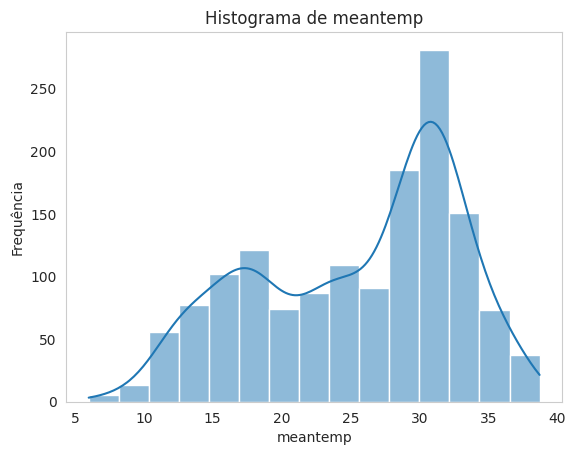

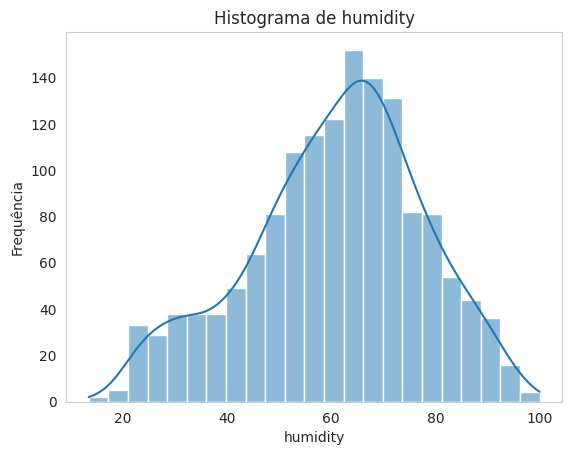

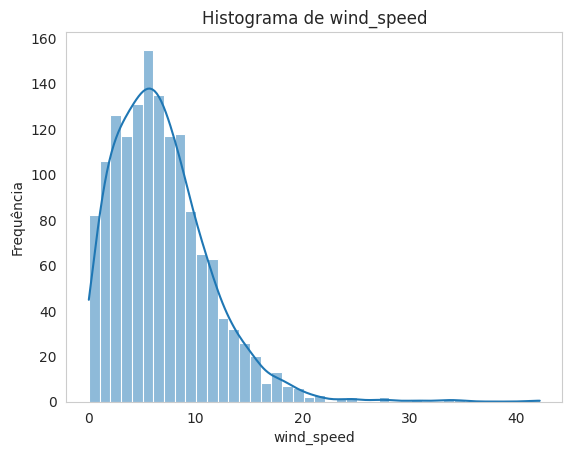

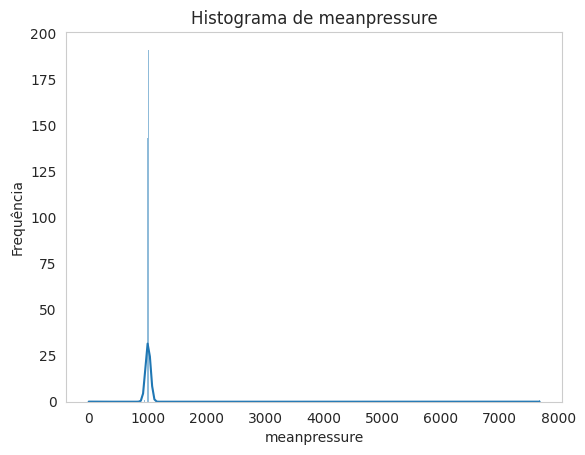

In [30]:
# Histogramas das variáveis numéricas
sns.set_style("whitegrid")

# Itera pelas colunas do DataFrame
for coluna in data.iloc[:, 1:-2]:
    # Cria o histograma para cada coluna
    sns.histplot(data=data, x=coluna, kde=True)

    # Remove as linhas de grade
    plt.grid(False)

    # Adiciona rótulos e título
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.title(f'Histograma de {coluna}')

    # Exibe o gráfico
    plt.show()

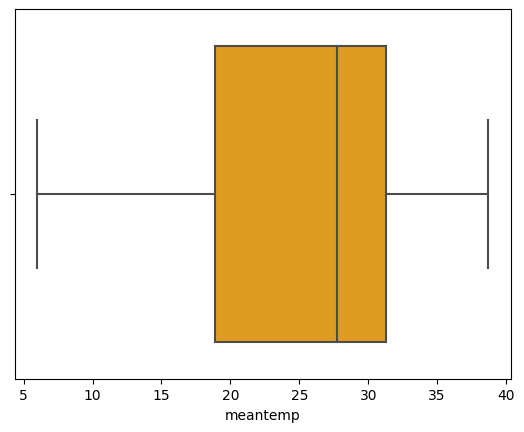

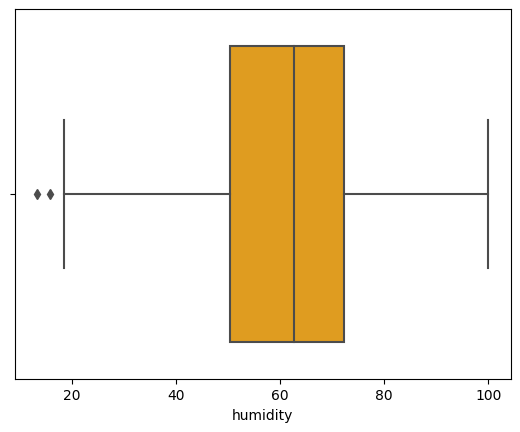

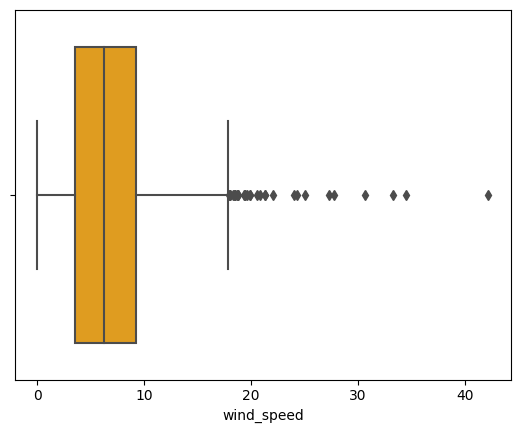

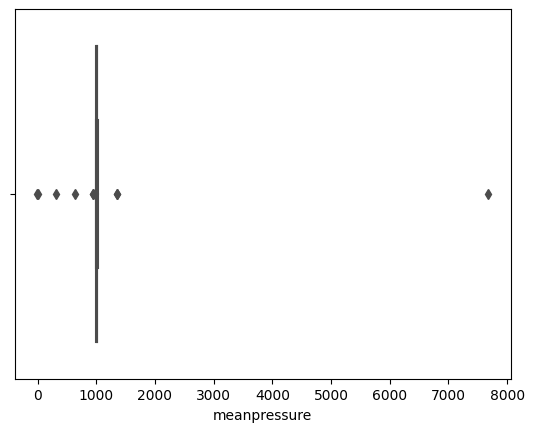

In [ ]:
# Boxplots das variáveis
colunas = data.iloc[:, 1:].columns
for i in colunas:
  sns.boxplot(x=data[i], color = 'orange')
  plt.show()

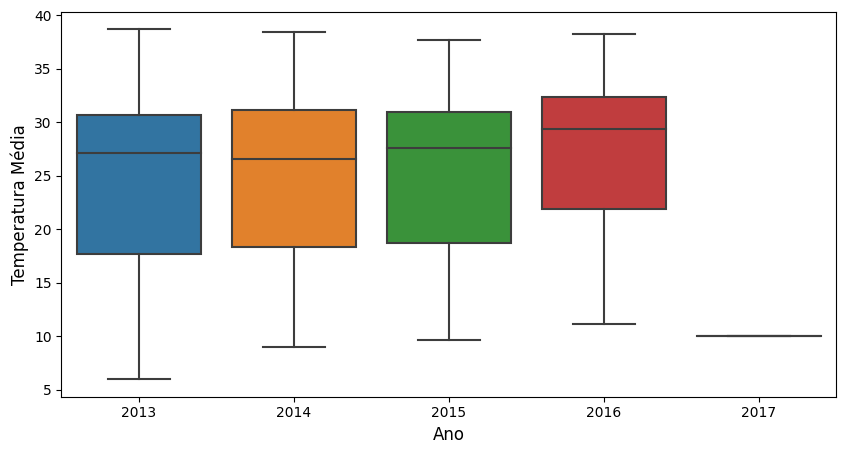

In [24]:
# Boxplot temperatura média por ano
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Ano'], y='meantemp', data = data)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Temperatura Média", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

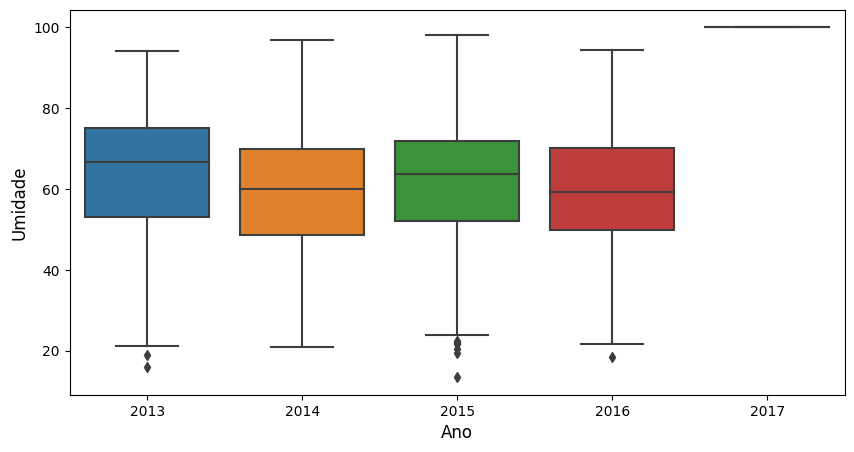

In [25]:
# Boxplot umidade por ano
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Ano'], y='humidity', data = data)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Umidade", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

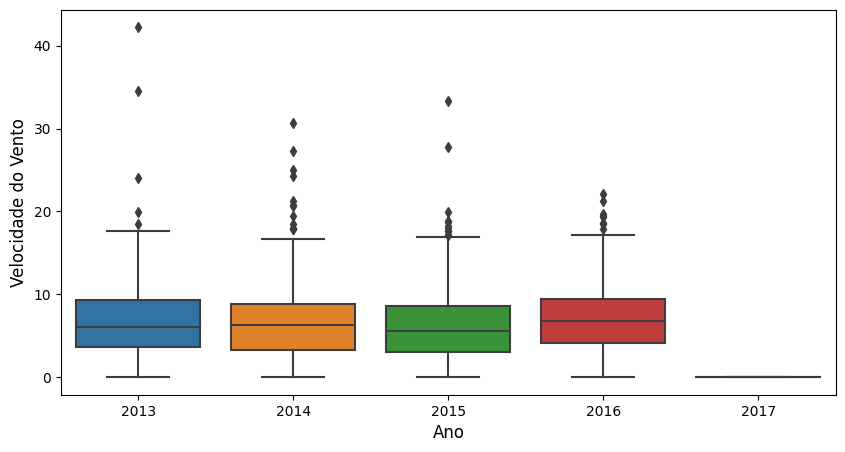

In [ ]:
# Boxplot velocidade do vento por ano
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Ano'], y='wind_speed', data = data)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Velocidade do Vento", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

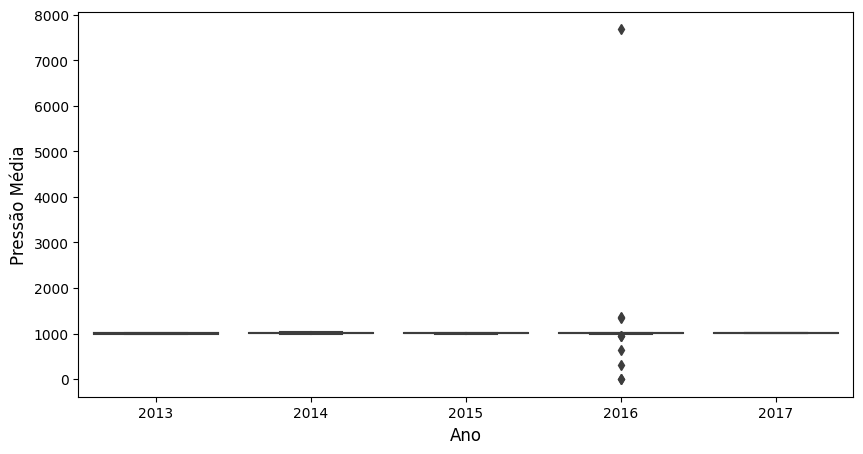

In [23]:
# Boxplot pressão média por ano
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Ano'], y='meanpressure', data = data)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pressão Média", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Text(0.5, 1.0, 'MeanPressure')

<Figure size 5000x3000 with 0 Axes>

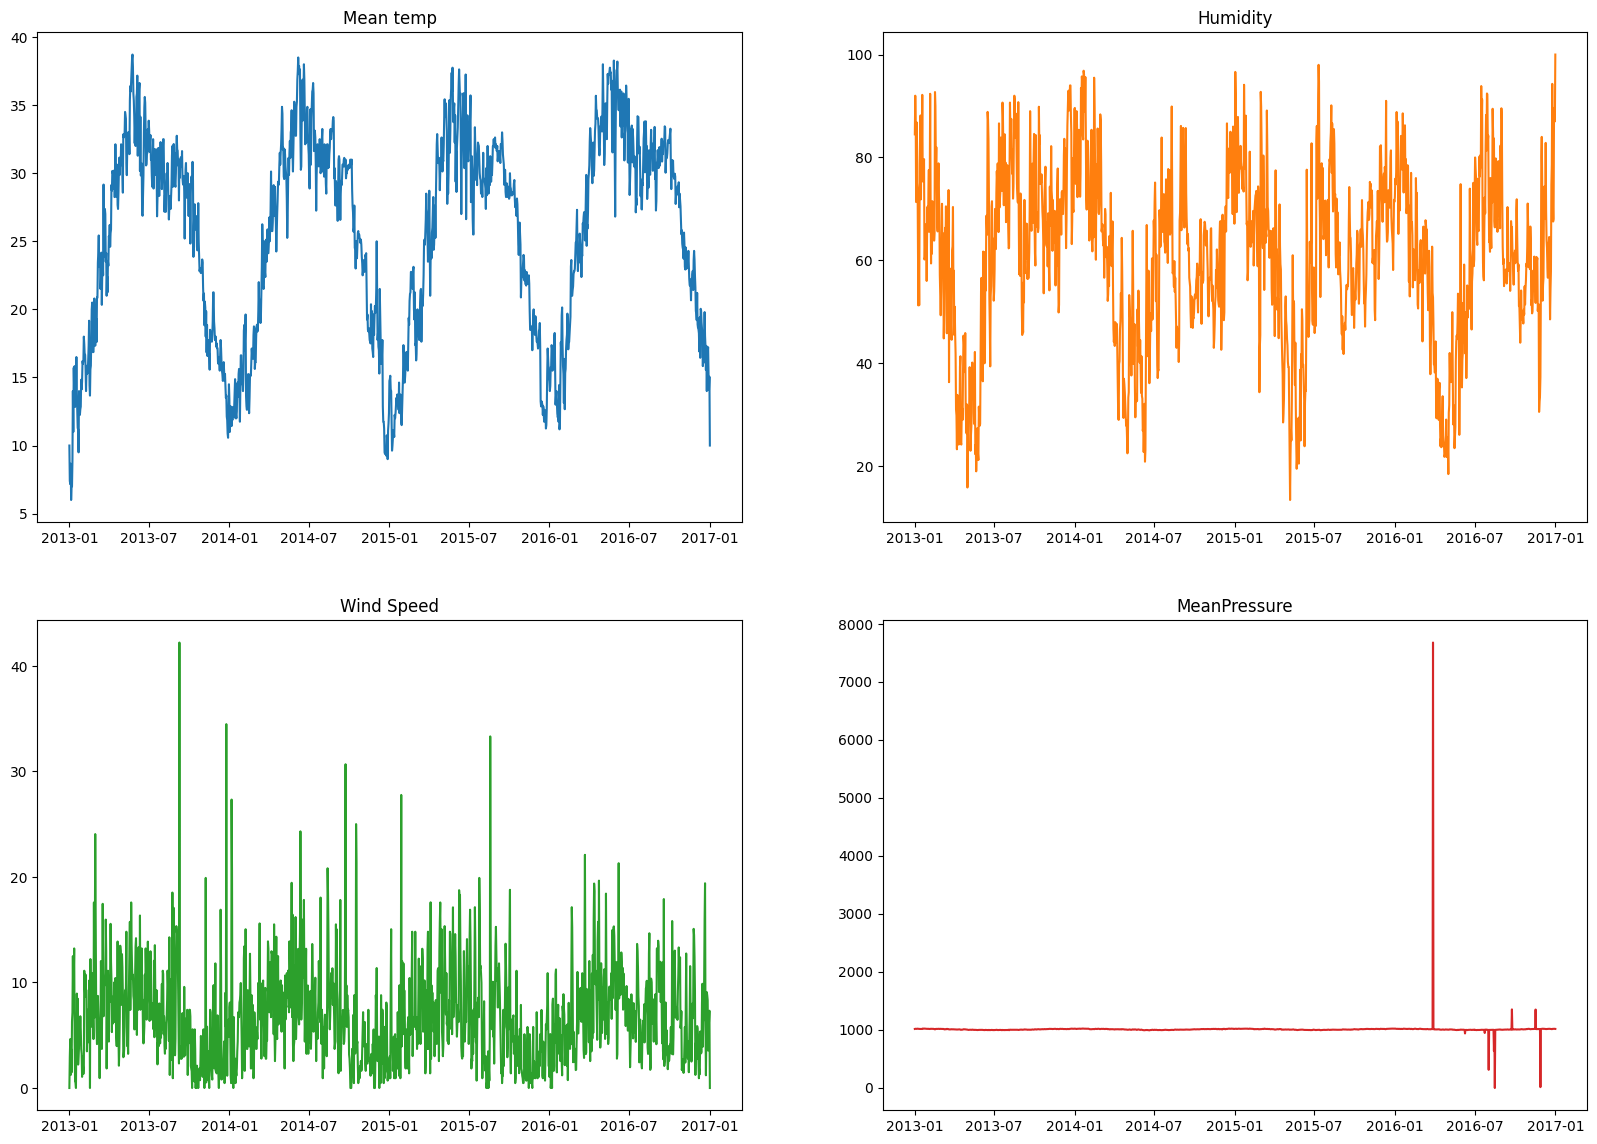

In [13]:
# Gráfico de série temporal
plt.figure(figsize=(50,30))
fig, axs = plt.subplots(2, 2,figsize=(20,14))
axs[0, 0].plot(data['date'],data['meantemp'])
axs[0, 0].set_title('Mean temp')
axs[0, 1].plot(data['date'],data['humidity'], 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[1, 0].plot(data['date'],data['wind_speed'], 'tab:green')
axs[1, 0].set_title('Wind Speed')
axs[1, 1].plot(data['date'],data['meanpressure'], 'tab:red')
axs[1, 1].set_title('MeanPressure')

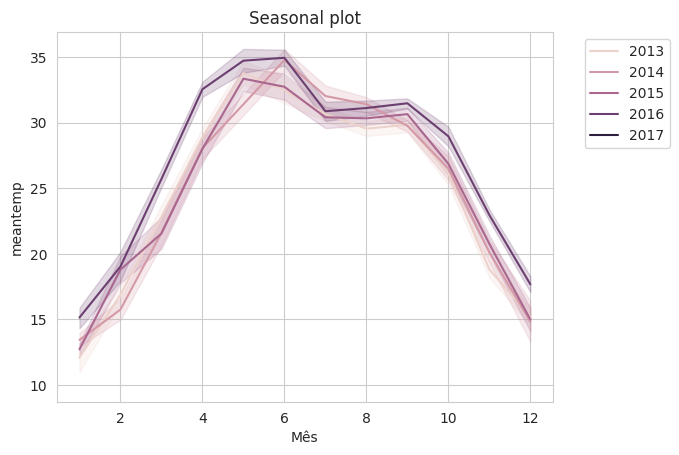

In [ ]:
sns.lineplot(data,
             x='Mês',
             y='meantemp',
             hue='Ano',
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

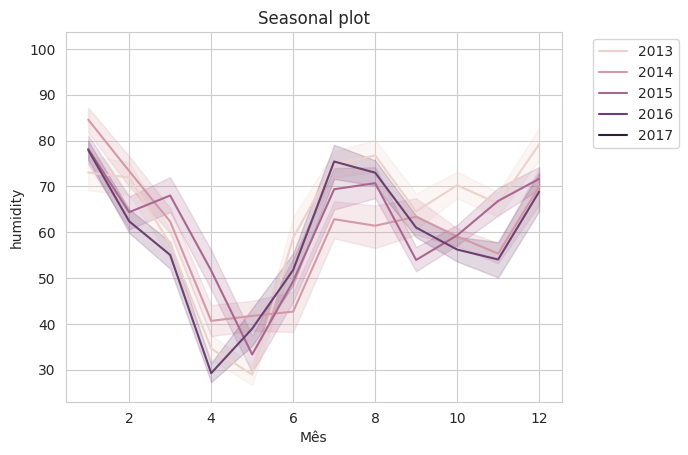

In [ ]:
sns.lineplot(data,
             x='Mês',
             y='humidity',
             hue='Ano',
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

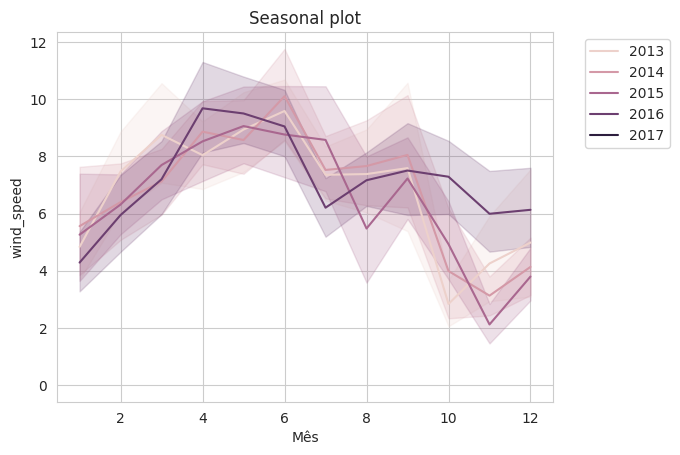

In [ ]:
sns.lineplot(data,
             x='Mês',
             y='wind_speed',
             hue='Ano',
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

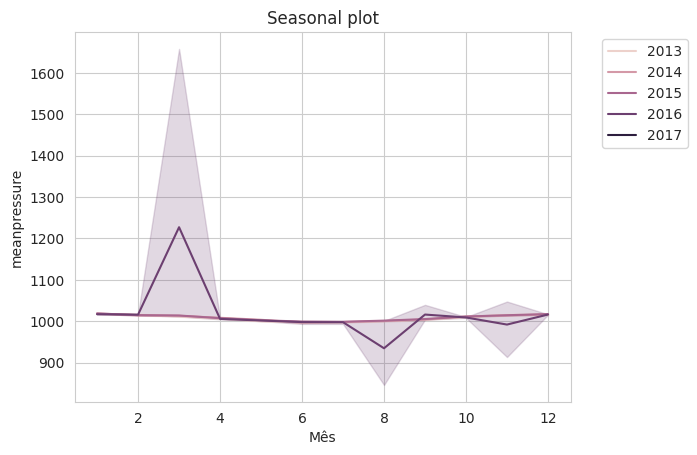

In [ ]:
sns.lineplot(data,
             x='Mês',
             y='meanpressure',
             hue='Ano',
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

# **Pré Processamento dos Dados**


In [ ]:
# Verificando se há linhas duplicadas
data.duplicated().sum()

0

In [ ]:
# Verificando valores ausentes
data.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

<ipython-input-17-3a1446b95663>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().round(2), annot = True)


<Axes: >

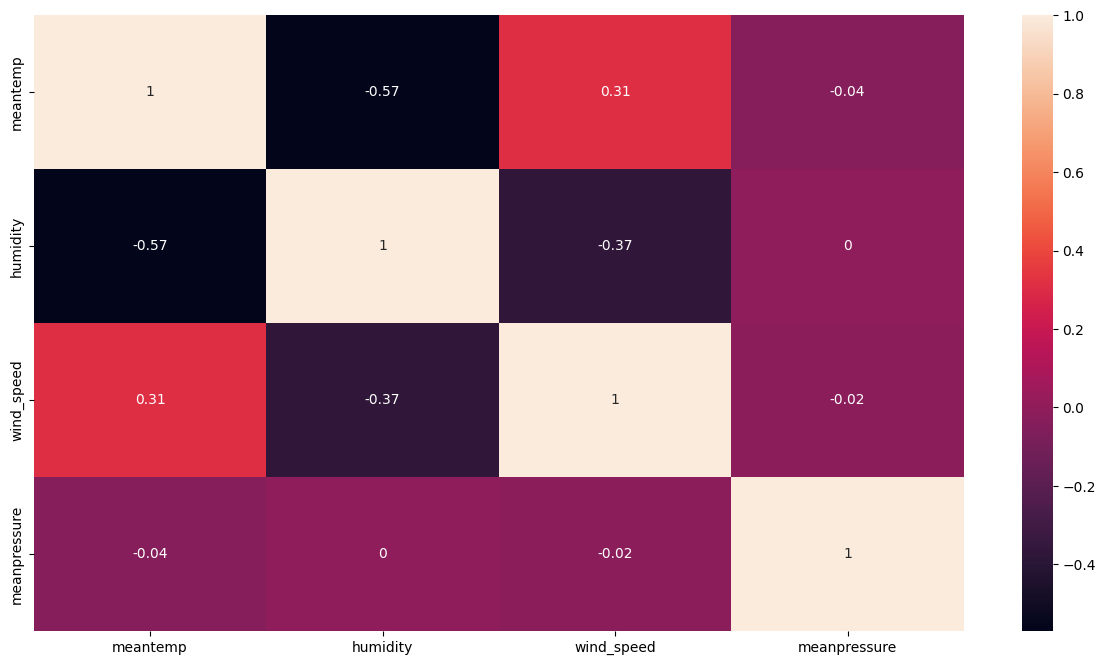

In [ ]:
# Matriz de correlação
plt.figure(figsize = (15,8))
sns.heatmap(data.corr().round(2), annot = True)

In [69]:
data['date'] = pd.to_datetime(data['date'], format = '%Y/%m/%d')
teste['date'] = pd.to_datetime(teste['date'], format = '%Y/%m/%d')

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='meantemp'>)

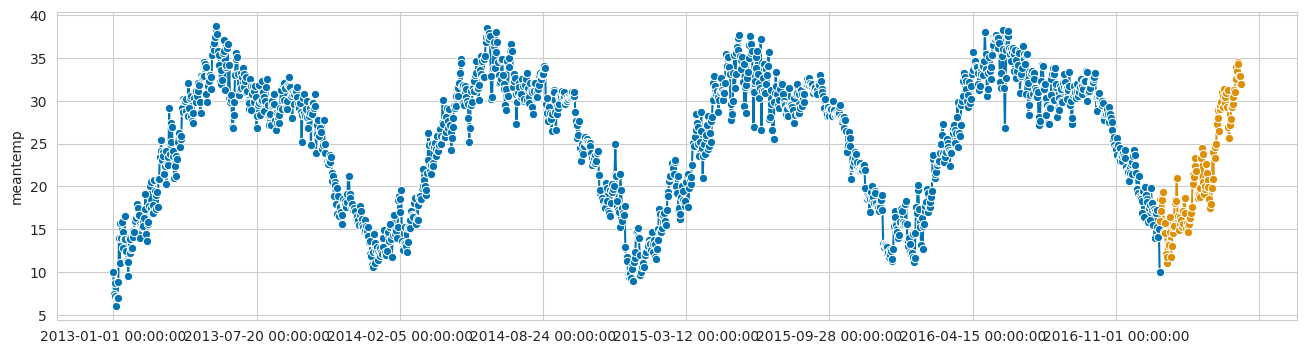

In [72]:
# Série Temporal
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y_train = data.set_index('date')['meantemp']
y_test = teste.set_index('date')['meantemp']
fh = np.arange(len(y_test)) + 1
plot_series(y_train, y_test)

# **Modelagem**


### **Base Line**

**Naive Forecast**

MAE: 11.713078920228241
MAPE: 0.49914100729999145
RMSE: 13.315100549507218


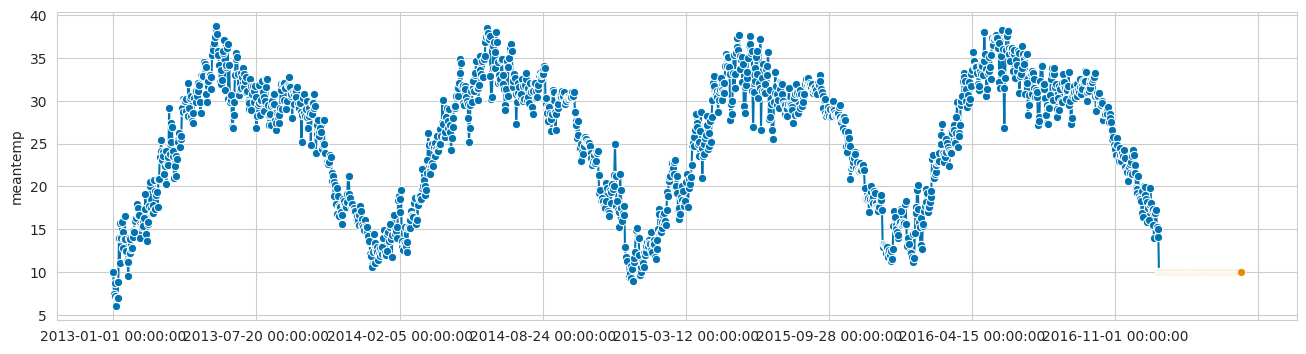

In [89]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_absolute_error

# Last: último valor conhecido

naive_forecaster = NaiveForecaster(strategy="last")
naive_forecaster.fit(y_train)
y_naive = naive_forecaster.predict(fh)
plot_series(y_train, y_naive)
print("MAE:", mean_absolute_error(y_test, y_naive))
print("MAPE:", mean_absolute_percentage_error(y_test, y_naive))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_naive)))

MAE: 6.612379974713908
MAP: 0.3677719915073565
RMSE: 7.375808452956063


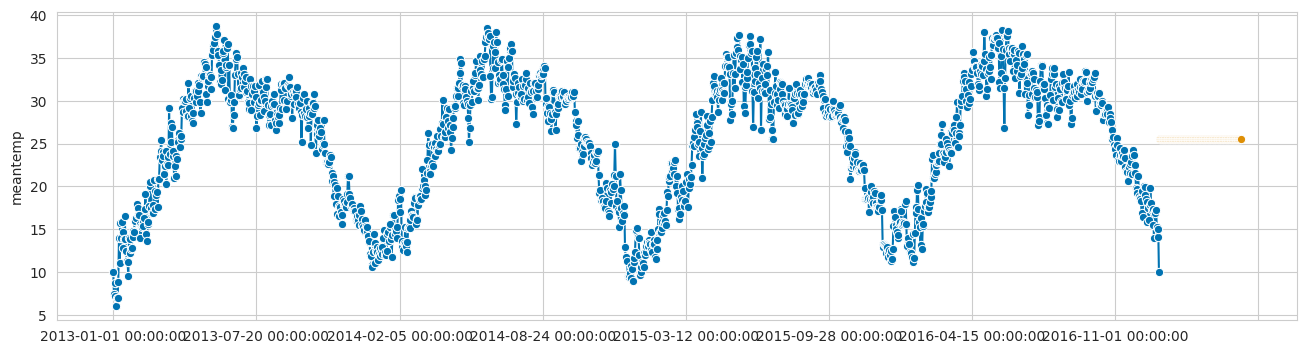

In [88]:
# Mean: média dos valores conhecidos

naive_forecaster = NaiveForecaster(strategy="mean")
naive_forecaster.fit(y_train)
y_naive = naive_forecaster.predict(fh)
plot_series(y_train, y_naive)
print("MAE:", mean_absolute_error(y_test, y_naive))
print("MAP:", mean_absolute_percentage_error(y_test, y_naive))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_naive)))

MAE: 11.713078920228241
MAPE: 0.49914100729999145
RMSE: 13.315100549507218


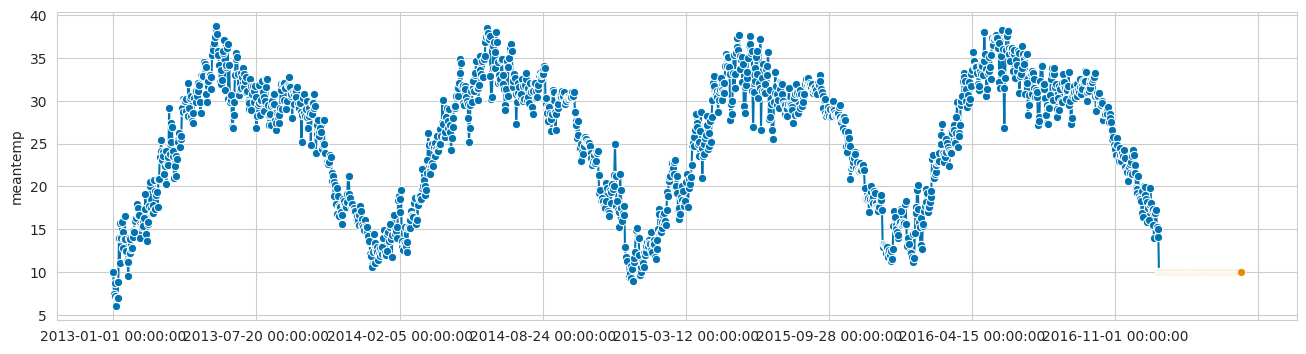

In [87]:
# Drift: crescimento linear entre o último e o primeiro valor

naive_forecaster = NaiveForecaster(strategy="drift")
naive_forecaster.fit(y_train)
y_naive = naive_forecaster.predict(fh)
plot_series(y_train, y_naive)
print("MAE:", mean_absolute_error(y_test, y_naive))
print("MAPE:", mean_absolute_percentage_error(y_test, y_naive))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_naive)))

**Auto ETS:**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

MAE: 10.63492338844408
MAPE: 0.44519759219215
RMSE: 12.37608974377502


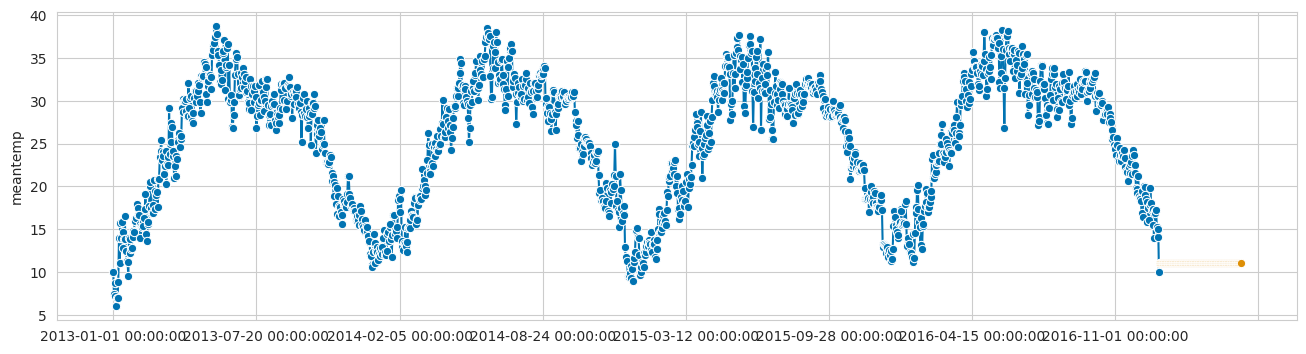

In [92]:
from sktime.forecasting.ets import AutoETS
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
forecaster = AutoETS(auto=True, sp=12) #12 picos no conjunto de treinamento
forecaster.fit(y_train)
y_last = forecaster.predict(fh)
plot_series(y_train, y_last)

print("MAE:", mean_absolute_error(y_test, y_last))
print("MAPE:", mean_absolute_percentage_error(y_test, y_last))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_last)))

**ExponentialSmoothing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



MAE: 10.448557638004257
MAPE: 0.4363595662867241
RMSE: 12.199832331663295


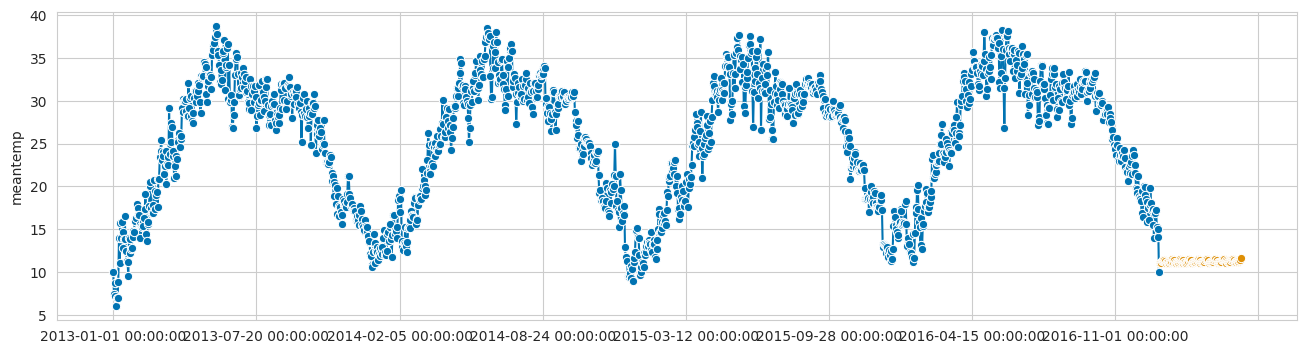

In [95]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# tendência: direção dos valores da variável em relação ao tempo
# sazonalidade: qualquer mudança ou padrão previsível, ou seja, repetição de comportamento

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_last = forecaster.predict(fh)
plot_series(y_train, y_last)

print("MAE:", mean_absolute_error(y_test, y_last))
print("MAPE:", mean_absolute_percentage_error(y_test, y_last))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_last)))

**AutoArima**

MAE: 9.416422543704165
MAPE: 0.3842303146847015
RMSE: 11.391726423019408


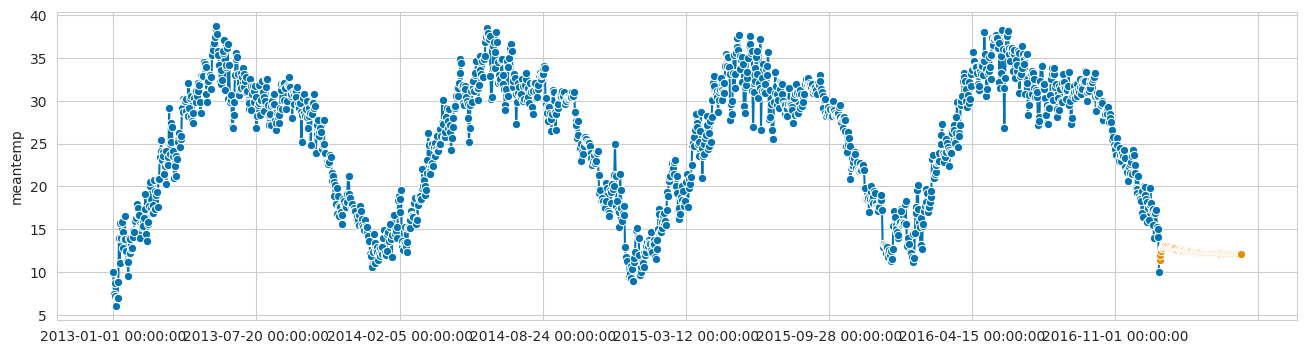

In [97]:
from sktime.forecasting.arima import AutoARIMA

#sp: sazonalidade
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_last = forecaster.predict(fh)
plot_series(y_train, y_last)

print("MAE:", mean_absolute_error(y_test, y_last))
print("MAPE:", mean_absolute_percentage_error(y_test, y_last))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_last)))

**Prophet**

In [104]:
from sktime.forecasting.fbprophet import Prophet

forecaster = Prophet()
forecaster.fit(y_train)
y_last = forecaster.predict(fh)

print("MAE:", mean_absolute_error(y_test, y_last))
print("MAPE:", mean_absolute_percentage_error(y_test, y_last))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_last)))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppe4pp1l5/y169y_qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppe4pp1l5/sbx05siq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79574', 'data', 'file=/tmp/tmppe4pp1l5/y169y_qj.json', 'init=/tmp/tmppe4pp1l5/sbx05siq.json', 'output', 'file=/tmp/tmppe4pp1l5/prophet_model7pdz0kvc/prophet_model-20230622005836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:58:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:58:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 2.2485291526540845
MAPE: 0.12024220674743982
RMSE: 2.779508935161102


**LSTM LAYER**

In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Dimensione os dados entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Converta os dados em um formato adequado para a LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Número de passos de tempo considerados para prever o próximo valor
X_train, y_train = create_dataset(y_train_scaled, time_steps)
X_test, y_test = create_dataset(y_test_scaled, time_steps)

In [132]:
# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(units=1))

# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
46/46 [==============================] - 3s 8ms/step - loss: 0.1539
Epoch 2/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 8/100
46/46 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 9/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0040
Epoch 10/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0038
Epoch 11/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0038
Epoch 12/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0038
Epoch 13/100
46/46 [=============

In [133]:
y_treino_pred = model.predict(X_train)
y_teste_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_teste_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_teste_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_teste_pred)))

4/4 [==============================] - 0s 5ms/step
MAE: 0.03907607437184254
MAPE: 0.0931078625022154
RMSE: 0.05004808698448336
